<a href="https://colab.research.google.com/github/AdolfoBenitez8/TP_IA_Rulemanes/blob/main/TP_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATASET, HUST bearing: a practical dataset for ball bearing fault diagnosis***
Se seleccionaron los datos de rulemanes con **ID 6207** de las siguientes características:

Diametro interno: 35 mm.

Diametro externo: 72 mm.

Diametro de bola: 11,0 mm.

Número de bola: 9

Al contar el DataSet con una gran cantidad de datos para distintos tipos de rulemanes y fallas, en este trabajo se utilizarán los datos B700 y N700.
Las referencias en los códigos son:

**B**700: La B hace referencia a condición de falla en elemento de rodadura.

B**7**00: El 7 hace referencia a rulemanes con ID 620**7**

B70**0**: El 0 hace referencia a condición de carga de 0 W.

Para N700 es análogo, pero N hace referencia a condición de falla normal.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from pylab import rcParams
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta1='/content/drive/MyDrive/IA PROFE/TP/B700.mat'
ruta2='/content/drive/MyDrive/IA PROFE/TP/N700.mat'
mat1 = scipy.io.loadmat(ruta1)
mat2 = scipy.io.loadmat(ruta2)

In [4]:
mat1['data']

array([[-0.41511647],
       [ 0.87028486],
       [-0.72504373],
       ...,
       [-0.79395709],
       [-1.8343575 ],
       [ 1.70762128]])

In [5]:
datos_ball = mat1['data'].flatten()[:51200]
datos_normal = mat2['data'].flatten()[:51200]
df_inicial=pd.DataFrame({'Ball': datos_ball, 'Normal': datos_normal})
df_inicial.head()

,Ball,Normal
0,-0.415116,0.058151
1,0.870285,0.063394
2,-0.725044,0.119316
3,-1.594264,-0.122625
4,-1.637347,-0.121662


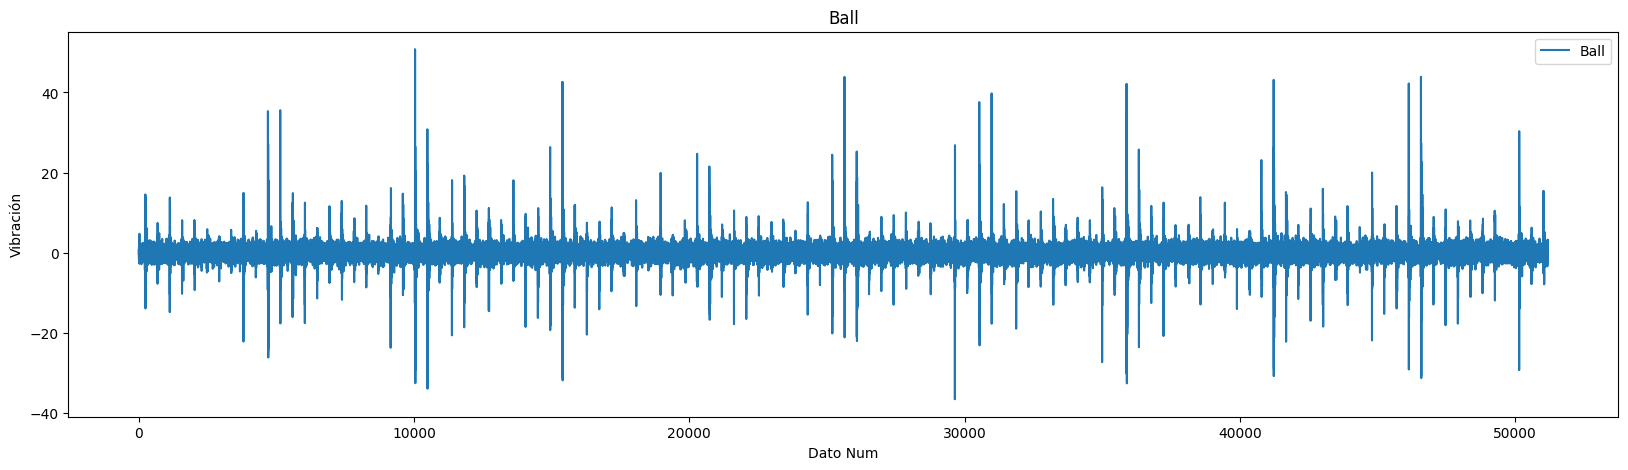

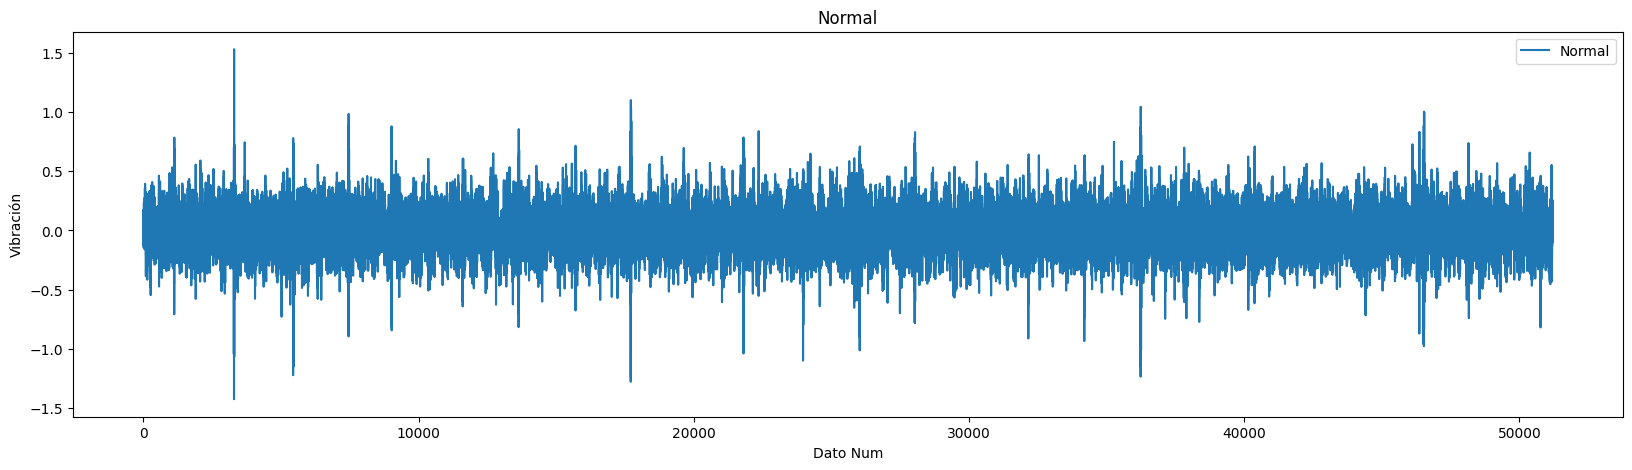

In [6]:
for i in df_inicial.columns:
  graficar = df_inicial[i]
  plt.figure(figsize=(20,5))
  plt.plot(graficar)
  plt.legend([i])
  plt.xlabel("Dato Num")
  plt.ylabel("Vibración")
  plt.title(i)
  plt.show()

# ***Características a calcular por cada intervalo***
Maximum value

Minimum value

Mean value

Standard deviation (Unbiased std)

Root mean square value (RMS)

Skewness

Kurtosis

Crest factor = Max / Rms

Form factor = Rms / Mean

***La cantidad de intervalos es tal para que la cantidad de datos sea de 1280***

In [7]:
# Número de datos por conjunto
num_per_set = 80
datos=np.concatenate([datos_ball,datos_normal])

# Dividir los datos y las etiquetas en conjuntos de 80
sets_data = [datos[i:i + num_per_set] for i in range(0, len(datos), num_per_set)]


# ***CARACTERISTICAS***

In [8]:
def compute_skewness(x):

    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [9]:
def compute_kurtosis(x):

    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [10]:
caracteristicas = []
for set in sets_data:
    caractersticasperset = [
        np.max(set),
        np.min(set),
        np.mean(set),
        np.std(set, ddof=1),
        np.sqrt(np.mean(set ** 2)),
        compute_skewness(set),
        compute_kurtosis(set),
        np.max(set) / np.sqrt(np.mean(set ** 2)),
        np.sqrt(np.mean(set ** 2)) / np.mean(set)
    ]
    caracteristicas.append(caractersticasperset)
    columnas = ['Max', 'Min', 'Mean', 'StdDev', 'RMS', 'Skewness', 'Kurtosis', 'Crest', 'Form']
    df= pd.DataFrame(caracteristicas, columns=columnas)

In [11]:
# Asignando una nueva columna que simboliza las fallas, 1 se refiere a falla de bola, y 0 a falla normal (las primeras 640 filas son de bola).
falla = np.concatenate([np.ones(640), np.zeros(len(df)-640)])
df['Falla']=falla
# Convertir la columna 'Falla' a una categoría para mejor visualización
df['Falla'] = df['Falla'].map({1.0: 'Ball', 0.0: 'Normal'})

print(df.head())
print(df.tail())

         Max        Min      Mean    StdDev       RMS  Skewness  Kurtosis  \
0   4.692215  -2.746502 -0.075357  1.318769  1.312666  0.316930  0.890452   
1   2.437119  -2.930174  0.095644  1.050381  1.048168  0.084041 -0.079492   
2  14.513516 -10.670930  0.286299  4.003733  3.988919  1.173906  4.028098   
3  10.190562 -13.977406 -0.308611  4.211183  4.196144 -0.366143  0.708861   
4   3.073921  -2.807302 -0.020451  1.304824  1.296805  0.162782 -0.316380   

      Crest       Form Falla  
0  3.574570 -17.419293  Ball  
1  2.325123  10.959052  Ball  
2  3.638459  13.932712  Ball  
3  2.428554 -13.596872  Ball  
4  2.370382 -63.410201  Ball  
           Max       Min      Mean    StdDev       RMS  Skewness  Kurtosis  \
1275  0.375400 -0.318446  0.044229  0.168610  0.173292 -0.028878 -0.715421   
1276  0.185791 -0.335876 -0.034498  0.115619  0.119962 -0.086757 -0.632967   
1277  0.366517 -0.305443  0.006317  0.133639  0.132952 -0.038800  0.039730   
1278  0.184273 -0.434338 -0.091795  0.1

In [12]:
df.head()

,Max,Min,Mean,StdDev,RMS,Skewness,Kurtosis,Crest,Form,Falla
0,4.692215,-2.746502,-0.075357,1.318769,1.312666,0.316930,0.890452,3.574570,-17.419293,Ball
1,2.437119,-2.930174,0.095644,1.050381,1.048168,0.084041,-0.079492,2.325123,10.959052,Ball
2,14.513516,-10.670930,0.286299,4.003733,3.988919,1.173906,4.028098,3.638459,13.932712,Ball
3,10.190562,-13.977406,-0.308611,4.211183,4.196144,-0.366143,0.708861,2.428554,-13.596872,Ball
4,3.073921,-2.807302,-0.020451,1.304824,1.296805,0.162782,-0.316380,2.370382,-63.410201,Ball


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
df.columns

Index(['Max', 'Min', 'Mean', 'StdDev', 'RMS', 'Skewness', 'Kurtosis', 'Crest',
       'Form', 'Falla'],
      dtype='object')

## **GRAFICANDO LOS DATOS**

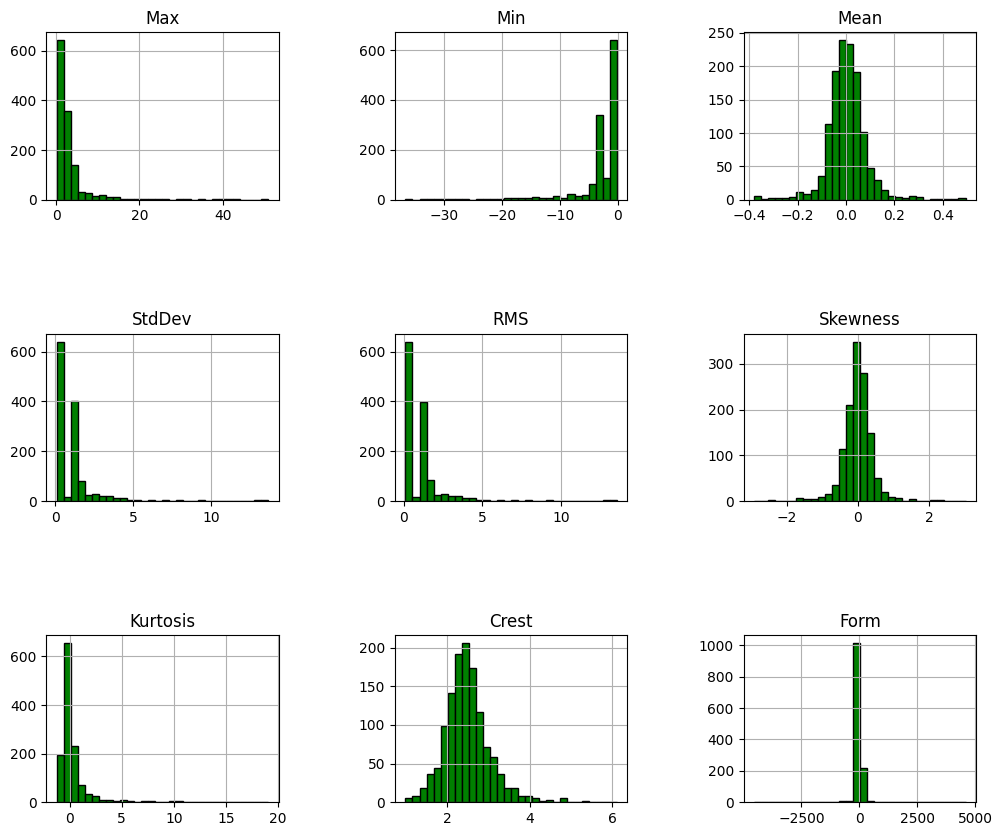

In [14]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black", color='green')
plt.subplots_adjust(hspace=0.8, wspace=0.5)

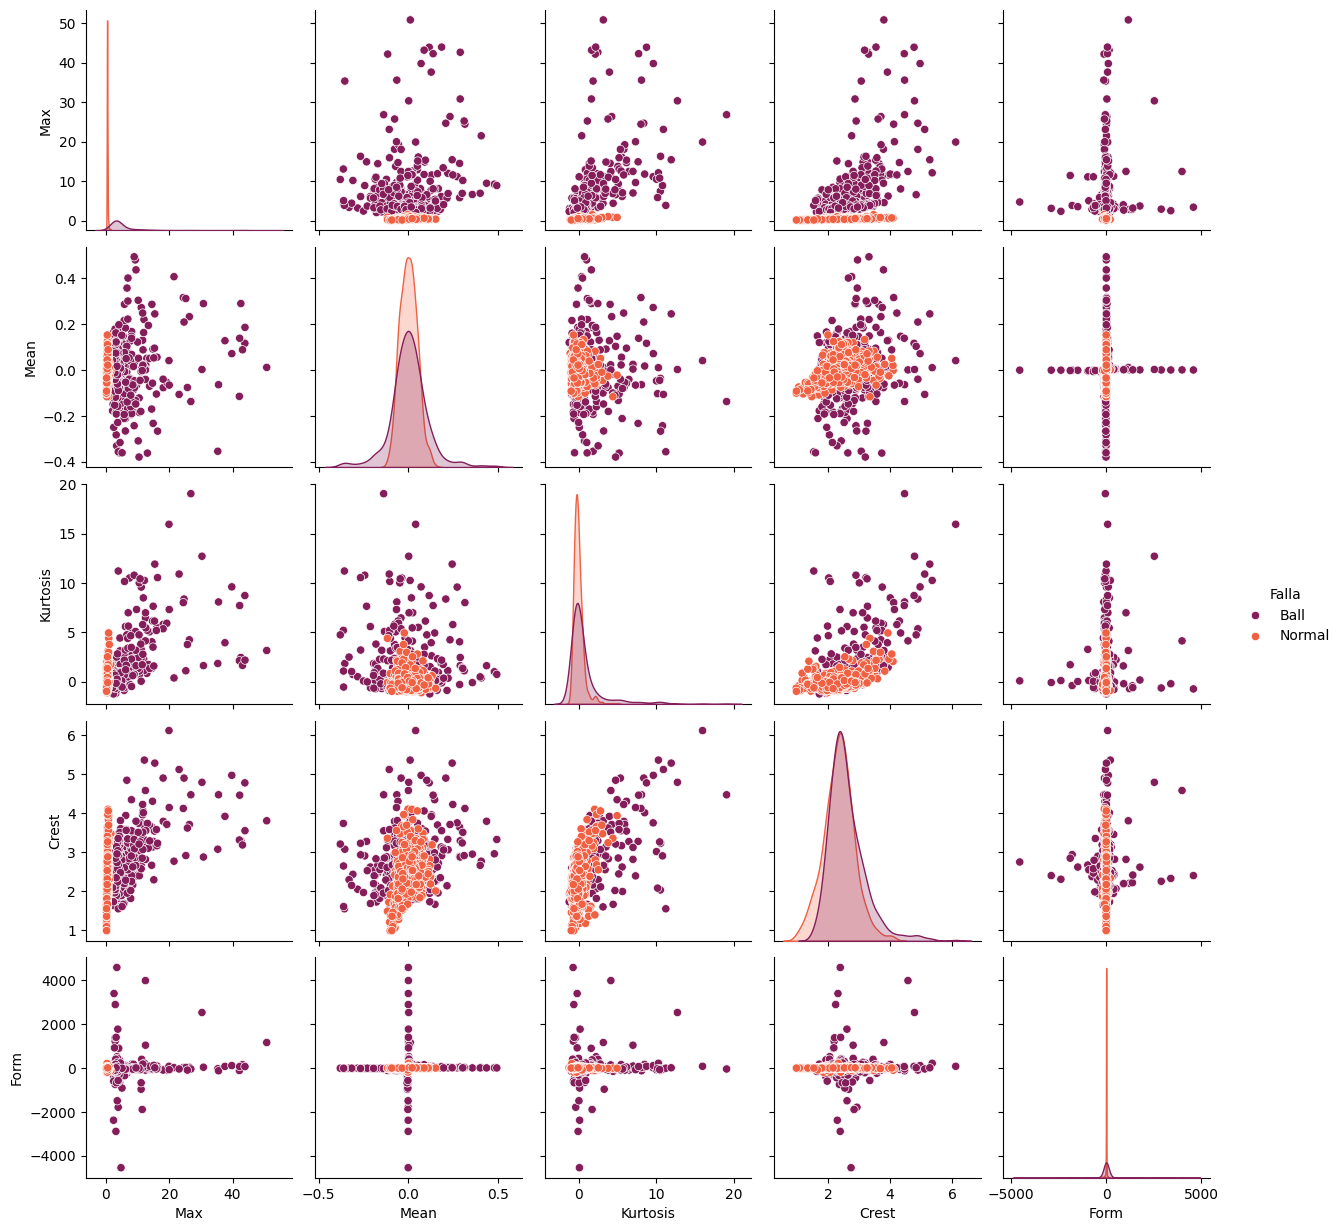

In [15]:
# Eligiendo los datos que creemos tienen mayor relevancia en la falla
features_custom_subset = df[['Max', 'Mean', 'Kurtosis', 'Crest','Form', 'Falla']]
defect_subset = features_custom_subset
rcParams['figure.figsize'] = 8, 6
sns.pairplot(defect_subset,hue='Falla',palette='rocket')